In [227]:
import numpy as np

In [2]:
import pickle

with open('./gangwon_preprocessed/DGDQ20000020/DGDQ20000020.pickle', "rb") as f:
    gangwon_data = pickle.load(f)
with open('./jeju_preprocessed/DZES20000026/DZES20000026.pickle', "rb") as f:
    jeju_data = pickle.load(f)

In [229]:
#gangwon = 0 jeju = 1
y_g = np.zeros(len(gangwon_data))
y_j = np.ones(len(jeju_data))
y = np.concatenate((y_g, y_j))

In [232]:
gangwon_data = np.stack(gangwon_data,axis=0)
jeju_data = np.stack(jeju_data, axis=0)
X = np.concatenate((gangwon_data, jeju_data), axis=0)

In [233]:
X = X.reshape(X.shape[0],-1)

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
from sklearn.linear_model import LogisticRegression
import numpy as np



model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)



/home/zambbo/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8596491228070176

In [2]:
import librosa
from matplotlib import pyplot  as plt
import librosa.display
import numpy as np

class PlotAudio:

    def __init__(self, y, sr):
        self.y = y
        self.sr = sr
    
    def waveshow(self):
        librosa.display.waveshow(self.y, self.sr)

    def spectroshow(self):
        spec = librosa.stft(y=self.y, n_fft=int(self.sr/40),hop_length=int(self.sr/100))
        spec = np.abs(spec)
        spec = librosa.amplitude_to_db(spec)
        librosa.display.specshow(spec, x_axis='time')

data_path = '../dataset/jeju/jeju_data_1/DZES20000002.wav'

In [3]:
%matplotlib inline
y, sr = librosa.load(data_path, sr=16000, offset=5, duration=3)

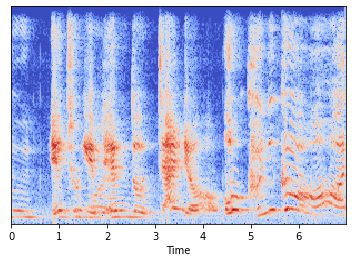

In [4]:
pla = PlotAudio(y, sr)
pla.spectroshow()

In [5]:
def chromagram(audio, samplerate, n_fft, hop_length):
    chroma = librosa.feature.chroma_stft(audio, samplerate, n_fft=n_fft, hop_length=hop_length)
    return chroma

def mfcc(audio, samplerate, n_fft, hop_length):
    mfcc = librosa.feature.mfcc(audio, samplerate, n_mfcc=100, n_fft= n_fft, hop_length= hop_length)
    return mfcc

def spectrogram(audio, n_fft, hop_length):
    stft = librosa.stft(audio, n_fft= n_fft, hop_length= hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    return log_spectrogram

/tmp/ipykernel_31543/3912133175.py:18: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr, ax=ax[j, i])
/tmp/ipykernel_31543/3912133175.py:18: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr, ax=ax[j, i])
/tmp/ipykernel_31543/3912133175.py:18: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr, ax=ax[j, i])
/tmp/ipykernel_31543/3912133175.py:18: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr, ax=ax[j, i])
/tmp/ipykernel_31543/3912133175.py:18: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result

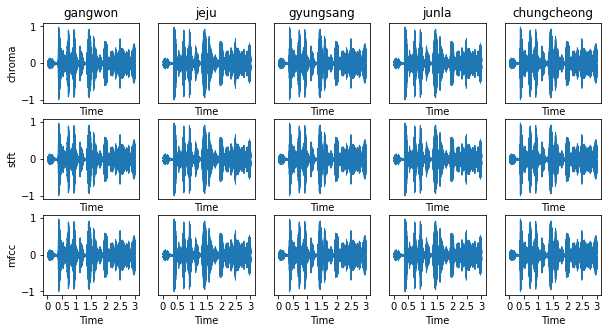

In [10]:
regions = ['gangwon', 'jeju', 'gyungsang', 'junla', 'chungcheong']
modes = ['chroma', 'stft', 'mfcc']

ax = plt.figure(figsize=(10,5)).subplots(nrows=3, ncols=len(regions))
n_fft = int(sr/40)
hop_length = int(sr/100)

for i, region in enumerate(regions):
    y = y
    sr = sr

    for j, mode in enumerate(modes):
        if i==0: ax[j, i].set_ylabel(mode)
        if j==0: ax[j, i].set_title(region)
        if j!=2: ax[j, i].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
        if i!=0: ax[j, i].tick_params(axis='y', which='both', left=False, labelleft=False)

        librosa.display.waveshow(y, sr, ax=ax[j, i])
plt.show()
        
    

In [38]:
y, sr = librosa.load(data_path, sr=16000)

/tmp/ipykernel_31543/363913561.py:6: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y_chunk2, sr)


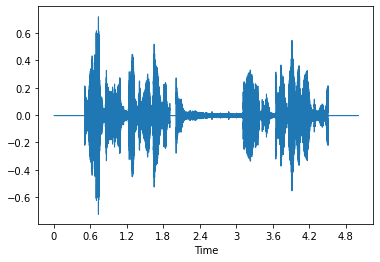

In [41]:
y_chunk1 = y[5*sr:7*sr]
y_chunk2 = y[20*sr:25*sr]
y_chunk2[0*sr:int(0.5*sr)] = list(map(lambda x:0,y_chunk2[0*sr:int(0.5*sr)]))
y_chunk2[int(4.5*sr):5*sr] = list(map(lambda x:0,y_chunk2[int(4.5*sr):5*sr]))
y_chunk3 = y[24*sr:26*sr]
librosa.display.waveshow(y_chunk2, sr)

In [30]:
len(list(map(lambda x:0,y_chunk2[0*sr:int(0.1*sr)])))

1600

In [9]:
import os
os.listdir('./testing')
cur_dir = os.path.abspath(os.path.join(os.getcwd(),'testing'))

['gangwon', 'jeonla', 'jeju', 'chungcheong', 'gyeongsang']

In [18]:
regions = os.listdir(cur_dir)

region_pickles = {reg:{'chroma':0, 'mfcc':1, 'spectro':2} for reg in regions}

import re
import pickle
c_pattern = re.compile("chroma.pickle$")
m_pattern = re.compile("mfcc.pickle$")
s_pattern = re.compile("spectro.pickle$")

for region_name in region_pickles.keys():
    file_name = os.listdir(os.path.join(cur_dir,region_name))[0]
    path = os.path.join(cur_dir, region_name, file_name)
    datas = os.listdir(path)
    for data in datas:
        if c_pattern.search(data) is not None:
            with open(os.path.join(path, data), "rb") as f:
                region_pickles[region_name]['chroma'] = pickle.load(f)
        if m_pattern.search(data) is not None:
            with open(os.path.join(path, data), "rb") as f:
                region_pickles[region_name]['mfcc'] = pickle.load(f)
        if s_pattern.search(data) is not None:
            with open(os.path.join(path, data), "rb") as f:
                region_pickles[region_name]['spectro'] = pickle.load(f)                

In [21]:
region_pickles['gangwon']['mfcc'].shape

(13, 100, 501)

In [30]:
region_pickles['gangwon']['spectro'].shape

(13, 201, 501)

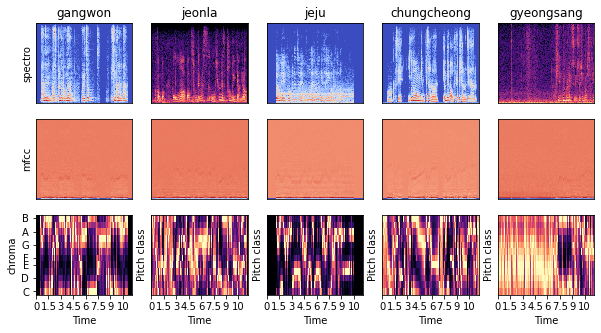

In [39]:
import matplotlib.pyplot as plt
import librosa.display
import librosa
ax = plt.figure(figsize=(10,5)).subplots(nrows=3, ncols=len(regions))
n_fft = 400
hop_length = 160
modes = ['spectro','mfcc','chroma']
for i, region in enumerate(regions):

    for j, mode in enumerate(modes):
        if mode=='spectro':
            librosa.display.specshow(region_pickles[region][mode][0], sr= 16000, hop_length=hop_length, ax=ax[j, i])
        if mode=='mfcc':
            librosa.display.specshow(region_pickles[region][mode][0], ax=ax[j, i])
        if mode=='chroma':
            librosa.display.specshow(region_pickles[region][mode][0], x_axis='time', y_axis=mode, ax=ax[j, i])
        if i==0: ax[j, i].set_ylabel(mode)
        if j==0: ax[j, i].set_title(region)
        if j!=2: ax[j, i].set_xticks([])
        if i!=0: ax[j, i].tick_params(axis='y', which='both', left=False, labelleft=False)

plt.show()